<a href="https://colab.research.google.com/github/JudeDihan/Titanic-Machine-Learning-from-Disaster/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1. Introduction

### 1.1 Project Description

Kaggle.com has opened a comtetion to predict the survival (survived or not) of a set of Titanic passengers. The competition can be found here: https://www.kaggle.com/c/titanic/overview

This project deals with the basic data exploration and training of models to find the optitmum Machine Learning model to predict which passengers survived of the test data set given by Kaggle. 

### 1.2 Initial Exploration of the Datasets

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the training set and test set.**

In [2]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")
print("Training Set Shape =", train_set.shape)
print("Testing Set Shape =", test_set.shape)

Training Set Shape = (891, 12)
Testing Set Shape = (418, 11)


The testing set has one less column than the training set. This is because the testing set lacks the "Survived" column, as expected.

In [3]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking for target column class imbalance**

First let's find out if any class imbalances are there for our target column ("Survived" Column). This will play a crucial role when we import our Scikit Machine Learning models.

In [4]:
# Make sure no null values are present in the target column.
print("No. of Null Values =",train_set["Survived"].isnull().sum())

print(train_set["Survived"].value_counts(normalize=True))

No. of Null Values = 0
0    0.616162
1    0.383838
Name: Survived, dtype: float64


**NOTE**: We have roughly 1.6 times more data on passengers that did not survived than the passengers that did survived. Let's keep this in mind as we go forward.

**Checking Null / Missing Values**

In [5]:
# Outputs the percentage of missing values in the training set.
print(train_set.isnull().sum() / len(train_set) * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [6]:
# Outputs the percentage of missing values in the test set.
print(test_set.isnull().sum() / len(test_set) * 100)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


Both the training set and the testing set seem to have equal percentages of missing values for the "Age" column and "Cabin" column. 

78% of missing data on the "Cabin" column is too high. It is better to drop this column from our dataset.

While 20% of data on the "Age" column is relatively a large amount, it is a very important column. Let's try to come up with a solution to keep this column. 

The "Embraked" column of the training set has two missing values (0.22%). Let's see if we can try to keep those rows as we continue our analysis.

**Dropping Columns that have no meaning in analysis**

Let's get rid of the following columns.

PassengerId : This has no effect on survival

Ticket: This has no effect on survival

Cabin: This column has 78% missing data.

In [7]:
drop_cols = ["Ticket", "Cabin"]
train_set = train_set.drop(drop_cols, axis=1)
print("Training Set Shape =", train_set.shape)

test_set = test_set.drop(drop_cols, axis=1)
print("Testing Set Shape =", test_set.shape)

Training Set Shape = (891, 10)
Testing Set Shape = (418, 9)


In [8]:
train_set.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


Now let's move on to a deeper exploration of our dataset.

# 2. In-depth Analysis

### 2.1 Pclass 

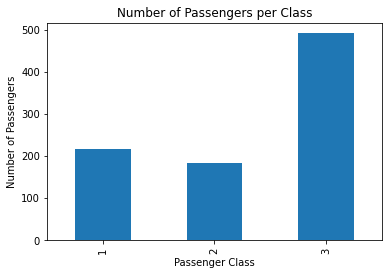

1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64


In [9]:
train_set["Pclass"].value_counts().sort_index().plot.bar()
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers per Class")
plt.show()
print(train_set["Pclass"].value_counts(normalize=True).sort_index())

55% of the passengers in our dataset travelled in the Lower Class while the rest is almost equally split between the Upper and Middle Class.

Now, let's look at the survival rates of the passengers of these classes.

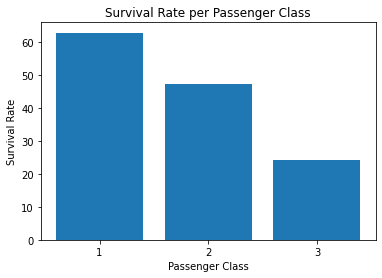

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [10]:
df = train_set[["Pclass","Survived"]].groupby("Pclass", as_index=False).mean()
plt.bar(df["Pclass"], df["Survived"]*100)
plt.xticks(df["Pclass"])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate per Passenger Class")
plt.show()

print(df[["Pclass","Survived"]])

Interestingly, but unexpectedly, the lowest passenger class has the lowest survival rate.

## 2.2 Gender

First let's code our "sex" column, so it will be easier to analyze and train our model.

In [11]:
coder = {"Sex": {"female":0, "male":1}}
train_set = train_set.replace(coder)
test_set = test_set.replace(coder)

train_set["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

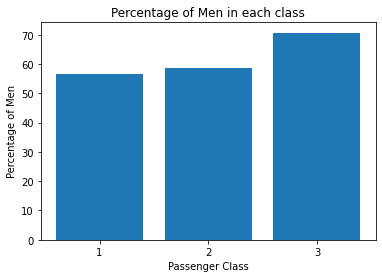

   Pclass       Sex
0       1  0.564815
1       2  0.586957
2       3  0.706721


In [12]:
df = train_set[["Pclass","Sex"]].groupby("Pclass", as_index=False).mean()
plt.bar(df["Pclass"], df["Sex"]*100)
plt.xticks(df["Pclass"])
plt.xlabel("Passenger Class")
plt.ylabel("Percentage of Men")
plt.title("Percentage of Men in each class")
plt.show()

print(df[["Pclass","Sex"]])

The percentage of women in the lowest class was around 30%, While the first and second classes shows a percentage of women of around 42% each.

**Survival Rate of Each Gender**

In [13]:
train_set[["Sex", "Survived"]].groupby("Sex", as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


74% of women have survived the Titanic sinking. While only 19% of men were able to survive the sinking. This corresponds with the reports mentioning that the Captain ordered the women and children to have first preference on the escape lifeboats 

## 2.3 Age

Lets see the distribution of age among the entire dataset.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


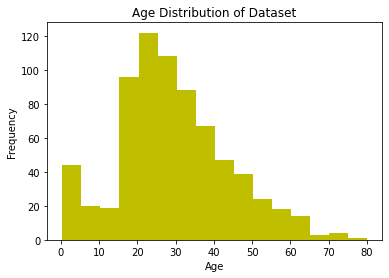

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
plt.hist(train_set["Age"], bins=16, color='y')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Dataset")
plt.show()

train_set["Age"].describe()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


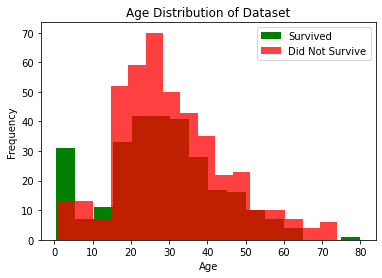

In [15]:
survived = train_set[train_set["Survived"]==1]
not_survived = train_set[train_set["Survived"]==0]

plt.hist(survived["Age"], bins=16, color='g', label="Survived")
plt.hist(not_survived["Age"], bins=16, color='r', alpha=0.75, label="Did Not Survive")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Dataset")
plt.legend()
plt.show()

In [16]:
def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [17]:
train_set = process_age(train_set)
test_set = process_age(test_set)

#Dropping the original "Age" column from the dataframes.
train_set = train_set.drop("Age", axis=1)
test_set = test_set.drop("Age", axis=1)

In [18]:
test_set.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age_categories
0,892,3,"Kelly, Mr. James",1,0,0,7.8292,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,7.0000,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,9.6875,Q,Senior
3,895,3,"Wirz, Mr. Albert",1,0,0,8.6625,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,12.2875,S,Young Adult


## 2.4 SibSp and Parch

Let's create a new column called "Lone_Traveler". If both SibSp and Parch equals zero for a passenger, they will be labeled 1 (alone), else, will be a 0 (not alone)

In [19]:
def Lone_Traveler(df):

  if df["Parch"] == 0 and df["SibSp"] == 0:
    return 1
  else:
    return 0

In [20]:
train_set["Lone_Traveler"] = train_set.apply(Lone_Traveler, axis=1)
test_set["Lone_Traveler"] = test_set.apply(Lone_Traveler, axis=1)

In [21]:
train_set[["Lone_Traveler","Survived"]].groupby("Lone_Traveler", as_index=False).mean()

,Lone_Traveler,Survived
0,0,0.505650
1,1,0.303538


Interesting. People who traveled alone had a 50% chance of survival while people that traveled with a sibling, spouse, parent or child had a survival chance reduced to 30%.
Let's drop "SibSp" and "Parch" and opt to have the "Lone_Traveler" Column only, instead.

In [22]:
drop_cols = ["SibSp", "Parch"]
train_set = train_set.drop(drop_cols, axis=1)
test_set = test_set.drop(drop_cols, axis=1)

## 2.5 Fare

Let's see the distribution of the "Fare" column.

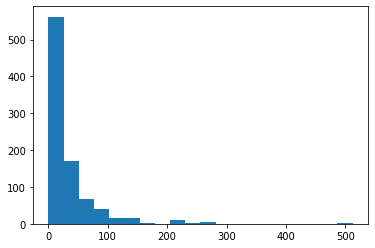

In [23]:
plt.hist(train_set["Fare"],bins=20)
plt.show()

Let's see the median fare for each Passenger class.

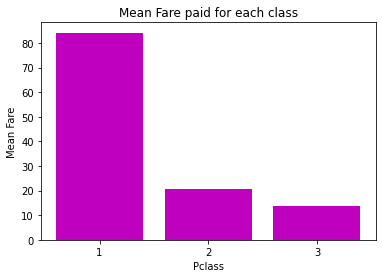

In [24]:
class_fares = train_set[["Fare","Pclass"]].groupby("Pclass",as_index=False).mean()

plt.bar(class_fares["Pclass"], class_fares["Fare"], color='m')
plt.xlabel("Pclass")
plt.ylabel("Mean Fare")
plt.title("Mean Fare paid for each class")
plt.xticks(class_fares["Pclass"])
plt.show()

In [25]:
print(test_set[test_set["Fare"].isnull()])

     PassengerId  Pclass  ... Age_categories  Lone_Traveler
152         1044       3  ...         Senior              1

[1 rows x 8 columns]


In [26]:
fare_null_row = test_set[test_set["Fare"].isnull()]
fnr_pclass = fare_null_row["Pclass"]
pclass_means = train_set[["Fare","Pclass"]].groupby("Pclass", as_index=False).mean()
test_set["Fare"] = test_set["Fare"].replace(np.nan, pclass_means.iloc[2]["Fare"])

In [27]:
test_set["Fare"].isnull().sum()

0

In [28]:
train_set[["Fare","Pclass"]].groupby("Pclass",as_index=False).describe()

Fare                                       ... Pclass                    
   count       mean        std  min       25%  ...    min  25%  50%  75%  max
0  216.0  84.154687  78.380373  0.0  30.92395  ...    1.0  1.0  1.0  1.0  1.0
1  184.0  20.662183  13.417399  0.0  13.00000  ...    2.0  2.0  2.0  2.0  2.0
2  491.0  13.675550  11.778142  0.0   7.75000  ...    3.0  3.0  3.0  3.0  3.0

[3 rows x 16 columns]

In [29]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Fare,Embarked,Age_categories,Lone_Traveler
0,1,0,3,"Braund, Mr. Owen Harris",1,7.2500,S,Young Adult,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,71.2833,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",0,7.9250,S,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,53.1000,S,Young Adult,0
4,5,0,3,"Allen, Mr. William Henry",1,8.0500,S,Young Adult,1


Now, let's group the Fare values, based on the histogram above, so we can catergorize it for ML

In [30]:
cut_points = [0,12,50,100,1000]
label_names = ["0-12","12-50","50-100","100+"]

train_set["Fare_categories"] = pd.cut(train_set["Fare"],cut_points,labels=label_names)
test_set["Fare_categories"] = pd.cut(test_set["Fare"],cut_points,labels=label_names)

train_set = train_set.drop("Fare", axis=1)
test_set = test_set.drop("Fare", axis=1)


In [31]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Embarked,Age_categories,Lone_Traveler,Fare_categories
0,892,3,"Kelly, Mr. James",1,Q,Young Adult,1,0-12
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,S,Adult,0,0-12
2,894,2,"Myles, Mr. Thomas Francis",1,Q,Senior,1,0-12
3,895,3,"Wirz, Mr. Albert",1,S,Young Adult,1,0-12
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,S,Young Adult,0,12-50


## 2.6 Embarked

Let's look at the survival rates of people embarked from different locations

In [32]:
train_set[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Clearly, passengers that embarked from Port "C" have had a better chance of survival. This is another important feature for consideration in our Machine Learning model.

Let's replace the port letters with numericals.

In [33]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Embarked,Age_categories,Lone_Traveler,Fare_categories
0,1,0,3,"Braund, Mr. Owen Harris",1,S,Young Adult,0,0-12
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,C,Adult,0,50-100
2,3,1,3,"Heikkinen, Miss. Laina",0,S,Young Adult,1,0-12
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,S,Young Adult,0,50-100
4,5,0,3,"Allen, Mr. William Henry",1,S,Young Adult,1,0-12


Let's replace the two missing data rows of the "Embarked" column with the mode of that column

In [34]:
print("Before =", train_set["Embarked"].isnull().sum())
mode = train_set["Embarked"].mode()
train_set["Embarked"] = train_set["Embarked"].fillna(mode.iloc[0])
print("After =", train_set["Embarked"].isnull().sum())


Before = 2
After = 0


Since the data in "Embarked" are categorical, let's convert the column to dummy variables and remove the original column. 

In [35]:
train_embark_dummies = pd.get_dummies(train_set["Embarked"], prefix="Embarked")
train_set = pd.concat([train_set, train_embark_dummies], axis=1)

test_embark_dummies = pd.get_dummies(test_set["Embarked"], prefix="Embarked")
test_set = pd.concat([test_set, test_embark_dummies], axis=1)

In [36]:
print(train_set.head())
print(test_set.head())

   PassengerId  Survived  Pclass  ... Embarked_C  Embarked_Q Embarked_S
0            1         0       3  ...          0           0          1
1            2         1       1  ...          1           0          0
2            3         1       3  ...          0           0          1
3            4         1       1  ...          0           0          1
4            5         0       3  ...          0           0          1

[5 rows x 12 columns]
   PassengerId  Pclass  ... Embarked_Q  Embarked_S
0          892       3  ...          1           0
1          893       3  ...          0           1
2          894       2  ...          1           0
3          895       3  ...          0           1
4          896       3  ...          0           1

[5 rows x 11 columns]


In [37]:
train_set = train_set.drop("Embarked", axis=1)
test_set = test_set.drop("Embarked", axis=1)

In [38]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age_categories,Lone_Traveler,Fare_categories,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,Young Adult,1,0-12,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,Adult,0,0-12,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,Senior,1,0-12,0,1,0
3,895,3,"Wirz, Mr. Albert",1,Young Adult,1,0-12,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,Young Adult,0,12-50,0,0,1


## 2.7 Name

Let's take a brief look at the "Name" column

In [39]:
train_set["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The names mean nothing in the ML model. However, we could extract the prefixes (or titles) from them and see if they make any sense in analysis.

In [40]:
prefixes = train_set["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
prefixes.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

Let's take a look at the unqiue values in prefixes

In [41]:
prefixes.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Countess      1
Jonkheer      1
Sir           1
Lady          1
Don           1
Capt          1
Name: Name, dtype: int64

In [42]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Rev",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

In [43]:
train_set["Name_prefix"] = prefixes.map(titles)
prefixes = train_set["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
test_set["Name_prefix"] = prefixes.map(titles)

Let's remove the "Name" column

In [44]:
train_set = train_set.drop("Name", axis=1)
test_set = test_set.drop("Name", axis=1)

In [45]:
train_set["Name_prefix"] = train_set["Name_prefix"].astype('category')
test_set["Name_prefix"] = test_set["Name_prefix"].astype('category')

In [46]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age_categories,Lone_Traveler,Fare_categories,Embarked_C,Embarked_Q,Embarked_S,Name_prefix
0,1,0,3,1,Young Adult,0,0-12,0,0,1,Mr
1,2,1,1,0,Adult,0,50-100,1,0,0,Mrs
2,3,1,3,0,Young Adult,1,0-12,0,0,1,Miss
3,4,1,1,0,Young Adult,0,50-100,0,0,1,Mrs
4,5,0,3,1,Young Adult,1,0-12,0,0,1,Mr


In [47]:
test_set.head()

,PassengerId,Pclass,Sex,Age_categories,Lone_Traveler,Fare_categories,Embarked_C,Embarked_Q,Embarked_S,Name_prefix
0,892,3,1,Young Adult,1,0-12,0,1,0,Mr
1,893,3,0,Adult,0,0-12,0,0,1,Mrs
2,894,2,1,Senior,1,0-12,0,1,0,Miss
3,895,3,1,Young Adult,1,0-12,0,0,1,Mrs
4,896,3,0,Young Adult,0,12-50,0,0,1,Mr


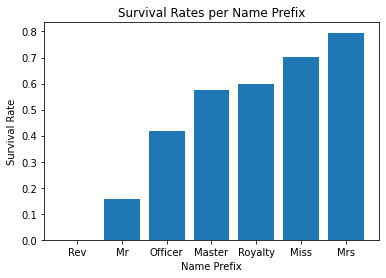

In [48]:
prefix_survival = train_set[['Survived','Name_prefix']].groupby("Name_prefix", as_index=False).mean().sort_values("Survived")
plt.bar(prefix_survival["Name_prefix"], prefix_survival["Survived"])
plt.xlabel("Name Prefix")
plt.ylabel("Survival Rate")
plt.title("Survival Rates per Name Prefix")
plt.show()

Now we are only left with numerical columns. 

# 3. Making Predictions

## 3.1 Data Preprocessing

In [49]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age_categories,Lone_Traveler,Fare_categories,Embarked_C,Embarked_Q,Embarked_S,Name_prefix
0,1,0,3,1,Young Adult,0,0-12,0,0,1,Mr
1,2,1,1,0,Adult,0,50-100,1,0,0,Mrs
2,3,1,3,0,Young Adult,1,0-12,0,0,1,Miss
3,4,1,1,0,Young Adult,0,50-100,0,0,1,Mrs
4,5,0,3,1,Young Adult,1,0-12,0,0,1,Mr


The columns "Pclass", "Age_Category", "Fare_categories" are categorical columns. Therefore, let's create dummy variables and remove the original columns.

In [50]:
def dummy_addition(df,col, pref):

  dummy_df = pd.get_dummies(df[col], prefix=pref)
  df = pd.concat([df,dummy_df], axis=1)
  return df

cols = ["Pclass", "Age_categories", "Fare_categories", "Name_prefix"]

for col in cols:

  train_set = dummy_addition(train_set, col, col)
  test_set = dummy_addition(test_set, col, col)

train_set = train_set.drop(cols, axis=1)
test_set = test_set.drop(cols, axis=1)

#Drop one of each of the dummies to prevent the dummy trap.
drop_cols = ["Pclass_1", "Age_categories_Missing", "Fare_categories_0-12", "Name_prefix_Mr"]
train_set = train_set.drop(drop_cols, axis=1)
test_set = test_set.drop(drop_cols, axis=1)

In [51]:
print(train_set.shape)
print(test_set.shape)

(891, 24)
(418, 23)


In [52]:
train_set.head()

,PassengerId,Survived,Sex,Lone_Traveler,Embarked_C,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Fare_categories_12-50,Fare_categories_50-100,Fare_categories_100+,Name_prefix_Master,Name_prefix_Miss,Name_prefix_Mrs,Name_prefix_Officer,Name_prefix_Rev,Name_prefix_Royalty
0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,3,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


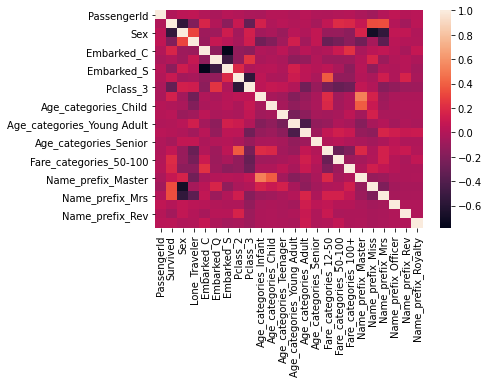

In [53]:
import seaborn as sns

correlations = (train_set.corr())
sns.heatmap(correlations, )
plt.show()

In [54]:
correlations["Survived"].sort_values()

Sex                          -0.543351
Pclass_3                     -0.322308
Lone_Traveler                -0.203367
Embarked_S                   -0.149683
Name_prefix_Rev              -0.064988
Age_categories_Senior        -0.051224
Age_categories_Child         -0.008328
PassengerId                  -0.005007
Age_categories_Young Adult   -0.001949
Embarked_Q                    0.003650
Name_prefix_Officer           0.007887
Age_categories_Adult          0.017590
Age_categories_Teenager       0.026859
Name_prefix_Royalty           0.033391
Fare_categories_12-50         0.065790
Name_prefix_Master            0.085221
Pclass_2                      0.093349
Age_categories_Infant         0.150304
Embarked_C                    0.168240
Fare_categories_100+          0.182033
Fare_categories_50-100        0.205384
Name_prefix_Miss              0.332795
Name_prefix_Mrs               0.344935
Survived                      1.000000
Name: Survived, dtype: float64

In [55]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   PassengerId                 891 non-null    int64
 1   Survived                    891 non-null    int64
 2   Sex                         891 non-null    int64
 3   Lone_Traveler               891 non-null    int64
 4   Embarked_C                  891 non-null    uint8
 5   Embarked_Q                  891 non-null    uint8
 6   Embarked_S                  891 non-null    uint8
 7   Pclass_2                    891 non-null    uint8
 8   Pclass_3                    891 non-null    uint8
 9   Age_categories_Infant       891 non-null    uint8
 10  Age_categories_Child        891 non-null    uint8
 11  Age_categories_Teenager     891 non-null    uint8
 12  Age_categories_Young Adult  891 non-null    uint8
 13  Age_categories_Adult        891 non-null    uint8
 14  Age_catego

## 3.2 Error Metrics

In [56]:
# Takes in the predictions coming out from the cross_val_predict function.
def true_positive_rates(metrics):

  predictions = pd.Series(predictions)
  print("METRICS ON TRAINING SET")
  # False Positives
  fp_filter = ((predictions == 1) & (train_set["Survived"] == 0))
  fp = len(predictions[fp_filter])
  print('False Positives =', fp) 

  # True Positives
  tp_filter = ((predictions == 1) & (train_set["Survived"]== 1))
  tp = len(predictions[tp_filter])
  print('True Positives =', tp) 

  # False Negatives
  fn_filter = ((predictions == 0) & (train_set["Survived"]== 1))
  fn = len(predictions[fn_filter])
  print('False Negatives =', fn) 

  # True Negatives
  tn_filter = ((predictions == 0) & (train_set["Survived"]== 0))
  tn = len(predictions[tn_filter])
  print('True Negatives =', tn) 

  print(" ")
  print("-"*35)
  print(" ")

  # True Positive Rate
  tpr = tp / (tp+fn)
  print("True Positive Rate =", tpr*100)

  # False Positive Rate
  fpr = fp / (fp+tn)
  print("False Positive Rate =", fpr*100)

  # Accuracy
  accuracy = (tp + tn)/(tp + tn + fp + fn)*100
  print("Accuracy =", accuracy)


In [57]:
train_cols = test_set.columns.tolist()
x_train = train_set[train_cols].drop("PassengerId", axis=1)
y_train = train_set["Survived"]
x_test = test_set.drop("PassengerId", axis=1)

Let's create a set of empty lists, that will eventually store data on ML model performances, so we can pick the best one.

In [58]:
column_names = ["ml_model","model_accuracy"]
performance_df = pd.DataFrame(columns=column_names)

def performance_list(title, predictions): 
  
  score = accuracy_score(y_train, predictions)
  ml_model = title
  model_accuracy = score
  newrow = {"ml_model":ml_model,"model_accuracy":score}
  performance_df = performance_df.append(newrow, ignore_index=True)


  return (print(performance_df))


In [59]:
# Create submission file for Kaggle
def kaggle_submit(test_preds, title):
  pass_id = test_set["PassengerId"]
  predictions_col = test_predictions
  data_dict = {"PassengerId": pass_id, "Survived": predictions_col}
  df = pd.DataFrame(data_dict)
  file_name = model_name+".csv"
  return df.to_csv(file_name, index=False)

Plan

1. Accuracy metrics from training set.
2. Store the accuracy data in list
3. Predict on test_set
4.Create submission file


## 3.3 Logistic Regression

In [60]:
model_name = "Logistic_Regression_Balanced"

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [61]:
lr_regressor = LogisticRegression(class_weight='balanced')
train_predictions = cross_val_predict(lr_regressor, x_train, y_train, cv=3)

In [62]:
print("Accuracy = ",accuracy_score(y_train, train_predictions))

Accuracy =  0.7856341189674523


In [63]:
# Store The Performance Data
column_names = ["ml_model","model_accuracy"]
performance_df = pd.DataFrame(columns=column_names)
score = accuracy_score(y_train, train_predictions)
newrow = {"ml_model":model_name,"model_accuracy":score}
performance_df = performance_df.append(newrow, ignore_index=True)
performance_df

,ml_model,model_accuracy
0,Logistic_Regression_Balanced,0.785634


In [64]:
# Predictions for test data.
lr_regressor = LogisticRegression(class_weight='balanced')
lr_regressor.fit(x_train, y_train)
test_predictions = lr_regressor.predict(x_test)



kaggle_submit(test_predictions, model_name)

## 3.4 Random Forrest Classifier

In [65]:
model_name = "RForrest_Balanced"
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(class_weight="balanced", random_state=1)
train_predictions = cross_val_predict(rf, x_train, y_train, cv=3)
print("Accuracy = ",accuracy_score(y_train, train_predictions))

# Store The Performance Data
score = accuracy_score(y_train, train_predictions)
newrow = {"ml_model":model_name,"model_accuracy":score}
performance_df = performance_df.append(newrow, ignore_index=True)
print(performance_df)

# Predictions for test data.
lr_regressor = LogisticRegression(class_weight='balanced')
lr_regressor.fit(x_train, y_train)
test_predictions = lr_regressor.predict(x_test)



kaggle_submit(test_predictions, model_name)


Accuracy =  0.8035914702581369
                       ml_model  model_accuracy
0  Logistic_Regression_Balanced        0.785634
1             RForrest_Balanced        0.803591


## 3.4 K Nearest Neighbors  

Let's write a code to find the best KNN value that gives the highest score between 1 and 50 neighbours


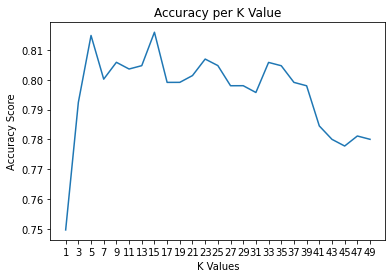

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = {}

for k in range(1,50,2):
  knn = KNeighborsClassifier(n_neighbors = k)
  score = cross_val_score(knn, x_train, y_train, cv=10)
  score = score.mean()
  knn_scores[k] = score

pd.Series(knn_scores).plot()
plt.xticks(range(1,50,2))
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("Accuracy per K Value")
plt.show()

We get the highest accuracy for k=15

In [67]:
model_name = "KNN_K15"

knn = KNeighborsClassifier(n_neighbors = 15)
train_predictions = cross_val_predict(knn, x_train, y_train, cv=10)
print("Accuracy = ",accuracy_score(y_train, train_predictions))

# Store The Performance Data
score = accuracy_score(y_train, train_predictions)
newrow = {"ml_model":model_name,"model_accuracy":score}
performance_df = performance_df.append(newrow, ignore_index=True)
print(performance_df)

# Predictions for test data.
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)
test_predictions = knn.predict(x_test)



kaggle_submit(test_predictions, model_name)

Accuracy =  0.8159371492704826
                       ml_model  model_accuracy
0  Logistic_Regression_Balanced        0.785634
1             RForrest_Balanced        0.803591
2                       KNN_K15        0.815937


## 3.7 Best Performing Features

Let's write a function that gives out the best performing features of an estimator using the RFECV library in Scikit learn. Let's apply this for Random Forrest for now.

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def best_features(df):

  x_train = df.drop(["PassengerId","Survived"], axis=1)
  y_train = df["Survived"]

  rfc = RandomForestClassifier(random_state=1)
  features = RFECV(rfc, cv=10)
  features.fit(x_train, y_train)

  best_features = list(x_train.columns[features.support_])
  print("Best Features =", best_features)
  return best_features

In [69]:
rf_best_features = best_features(train_set)

Best Features = ['Sex', 'Lone_Traveler', 'Embarked_C', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Age_categories_Infant', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Name_prefix_Master', 'Name_prefix_Miss', 'Name_prefix_Mrs']


In [70]:
model_name = "RForrest_Best Features"
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

x_train = x_train[rf_best_features]
x_test = x_test[rf_best_features]

rf = RandomForestClassifier(class_weight="balanced", random_state=1)
train_predictions = cross_val_predict(rf, x_train, y_train, cv=3)
print("Accuracy = ",accuracy_score(y_train, train_predictions))

# Store The Performance Data
score = accuracy_score(y_train, train_predictions)
newrow = {"ml_model":model_name,"model_accuracy":score}
performance_df = performance_df.append(newrow, ignore_index=True)
print(performance_df)

# Predictions for test data.
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
rf.fit(x_train, y_train)
test_predictions = rf.predict(x_test)



kaggle_submit(test_predictions, model_name)


Accuracy =  0.8103254769921436
                       ml_model  model_accuracy
0  Logistic_Regression_Balanced        0.785634
1             RForrest_Balanced        0.803591
2                       KNN_K15        0.815937
3        RForrest_Best Features        0.810325


## 3.8 Best Performing Model Selection Through Grid Search

Let's now use the technique to find the best features and with Grid Search to find the best model we could come up with.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df,features):
    
    x_train = df.drop(["PassengerId","Survived"], axis=1)
    y_train = df["Survived"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(x_train,y_train)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train_set,cols)

LogisticRegression
------------------
Best Score: 0.8148314606741573
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.8170661672908863
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score: 0.8249563046192259
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}



From the above output, we can see that the KNeighborsClassifier classifier and the Random Forrest Classifier has better scores than the models we manually tunes. Let's predict on our test set with above parameters and see what we get


In [72]:
# Prediction with KNeighborsClassifier
# Best Score: 0.8170661672908863
# Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

model_name = "KNN_From_Best_Model_Selector"

# Store The Performance Data
score = 0.8170661672908863
newrow = {"ml_model":model_name,"model_accuracy":score}
performance_df = performance_df.append(newrow, ignore_index=True)
print(performance_df)

# Predictions for test data.
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors= 15, p= 1, weights= 'uniform')
knn.fit(x_train, y_train)
test_predictions = knn.predict(x_test)



kaggle_submit(test_predictions, model_name)

                       ml_model  model_accuracy
0  Logistic_Regression_Balanced        0.785634
1             RForrest_Balanced        0.803591
2                       KNN_K15        0.815937
3        RForrest_Best Features        0.810325
4  KNN_From_Best_Model_Selector        0.817066


In [76]:
# Prediction with RandomForestClassifier
# Best Score: 0.8249563046192259
# Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}

model_name = "RandomForestClassifier_From_Best_Model_Selector"

# Store The Performance Data
score = 0.8249563046192259
newrow = {"ml_model":model_name,"model_accuracy":score}
performance_df = performance_df.append(newrow, ignore_index=True)
print(performance_df)

# Predictions for test data.


rf = RandomForestClassifier(criterion='entropy' , max_depth= 10, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 6)
rf.fit(x_train, y_train)
test_predictions = rf.predict(x_test)


kaggle_submit(test_predictions, model_name)

                                          ml_model  model_accuracy
0                     Logistic_Regression_Balanced        0.785634
1                                RForrest_Balanced        0.803591
2                                          KNN_K15        0.815937
3                           RForrest_Best Features        0.810325
4                     KNN_From_Best_Model_Selector        0.817066
5  RandomForestClassifier_From_Best_Model_Selector        0.824956


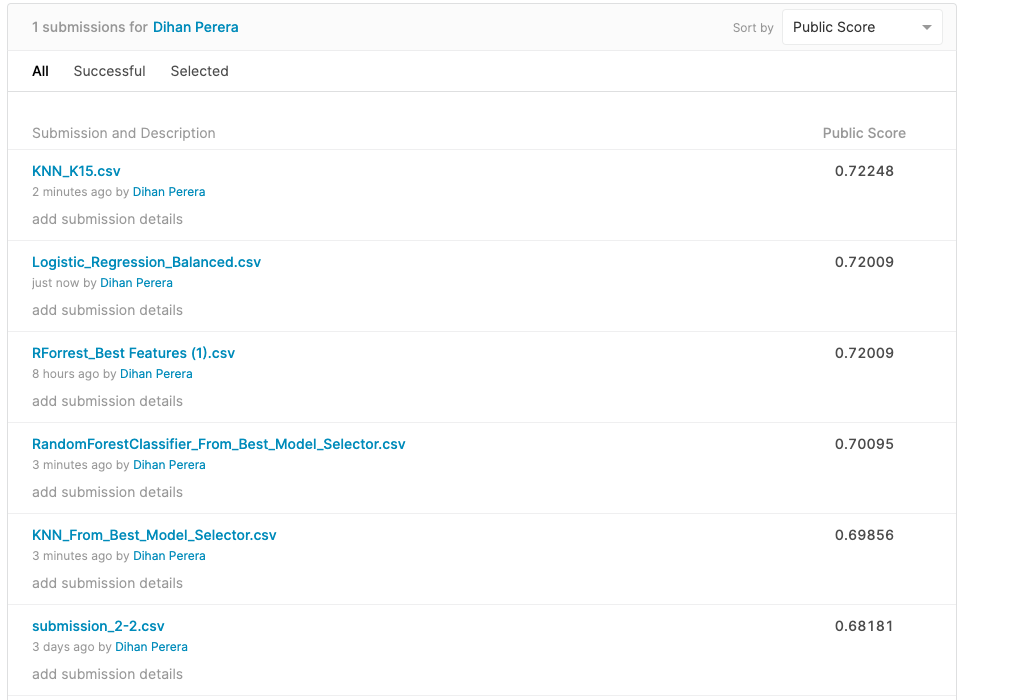

Interestingly, it is KNN_K15 prediction that gave the highest score in Kaggle. The models that we ran through our "select_model" function to find the best parameters have seem to overfit those models as they scored poorly in Kaggle. 